# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | machico
Processing Record 2 of Set 1 | sparta
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | mahdia
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | mugia
Processing Record 7 of Set 1 | divnoye
Processing Record 8 of Set 1 | santa cruz
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | zhanibek
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | jayapura
Processing Record 13 of Set 1 | labasa
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | waspan
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | vilyuysk
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | soe
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | bethel
Processing Rec

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,machico,32.7000,-16.7667,22.62,64,40,5.66,PT,1716830954
1,sparta,43.9441,-90.8129,20.56,62,20,0.00,US,1716830954
2,mahdia,35.5047,11.0622,25.97,50,31,5.27,TN,1716830955
3,olonkinbyen,70.9221,-8.7187,0.63,92,100,4.51,SJ,1716830955
4,mugia,43.1041,-9.2179,15.51,70,99,5.53,ES,1716830955


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,machico,32.7000,-16.7667,22.62,64,40,5.66,PT,1716830954
1,sparta,43.9441,-90.8129,20.56,62,20,0.00,US,1716830954
2,mahdia,35.5047,11.0622,25.97,50,31,5.27,TN,1716830955
3,olonkinbyen,70.9221,-8.7187,0.63,92,100,4.51,SJ,1716830955
4,mugia,43.1041,-9.2179,15.51,70,99,5.53,ES,1716830955


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

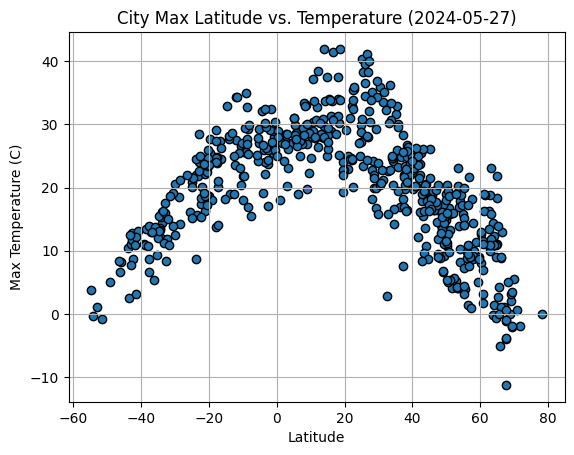

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolor="black",linewidths=1,marker="o")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (%s)'%time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

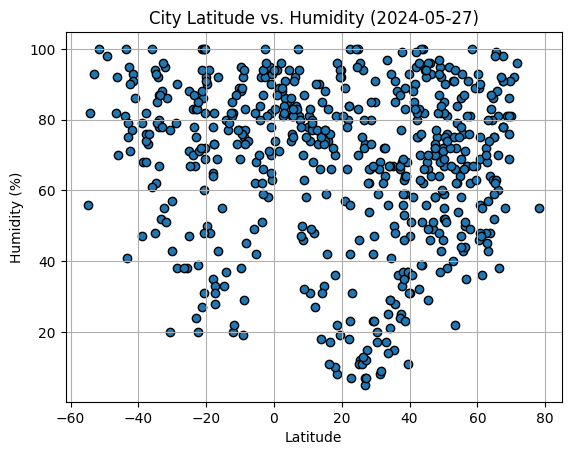

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolor="black",linewidths=1,marker="o")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%s)'%time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

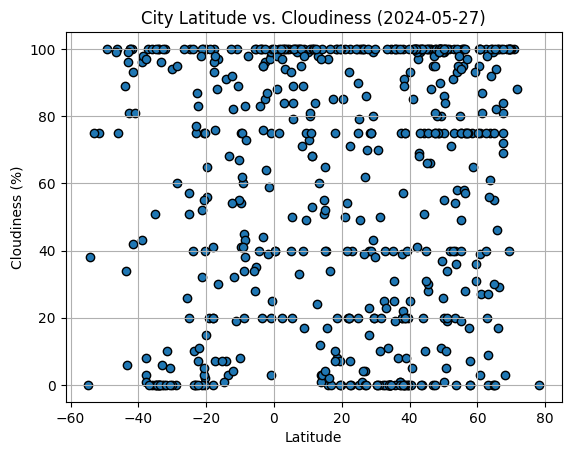

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolor="black",linewidths=1,marker="o")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)'%time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

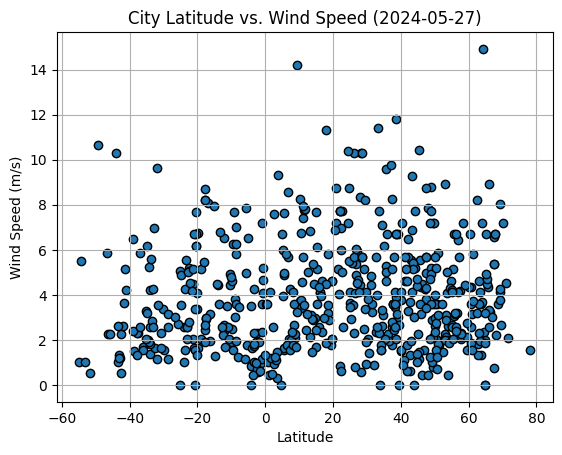

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolor="black",linewidths=1,marker="o")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (%s)'%time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def lin_regress(x,y,title,text_coordinate):
    (slope,intercept,r_value,p_value,stderr) = linregress(x,y)
    regress_values = x*slope+intercept
    line_eq = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,text_coordinate,fontsize=15,color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'the r-value is: {r_value**2}')
    plt.show()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,machico,32.7000,-16.7667,22.62,64,40,5.66,PT,1716830954
1,sparta,43.9441,-90.8129,20.56,62,20,0.00,US,1716830954
2,mahdia,35.5047,11.0622,25.97,50,31,5.27,TN,1716830955
3,olonkinbyen,70.9221,-8.7187,0.63,92,100,4.51,SJ,1716830955
4,mugia,43.1041,-9.2179,15.51,70,99,5.53,ES,1716830955


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,santa cruz,-17.8000,-63.1667,13.70,82,100,8.23,BO,1716830795
9,avarua,-21.2078,-159.7750,24.03,100,32,2.06,CK,1716830955
10,jayapura,-2.5333,140.7000,23.66,94,96,2.29,ID,1716830956
11,labasa,-16.4167,179.3833,24.47,92,97,1.96,FJ,1716830956
13,adamstown,-25.0660,-130.1015,20.82,71,51,5.04,PN,1716830956


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.6164321115468706


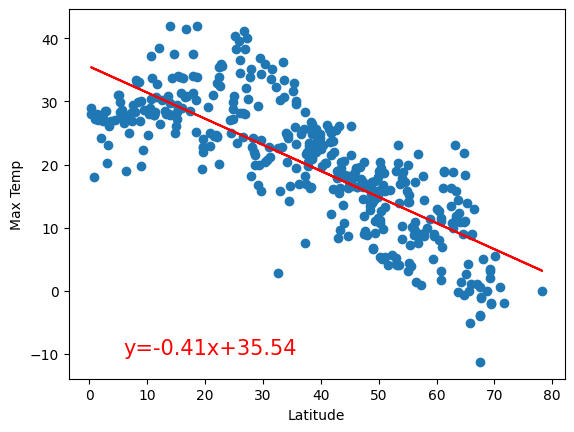

In [38]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Max Temp',(6,-10))

the r-value is: 0.7174552827126426


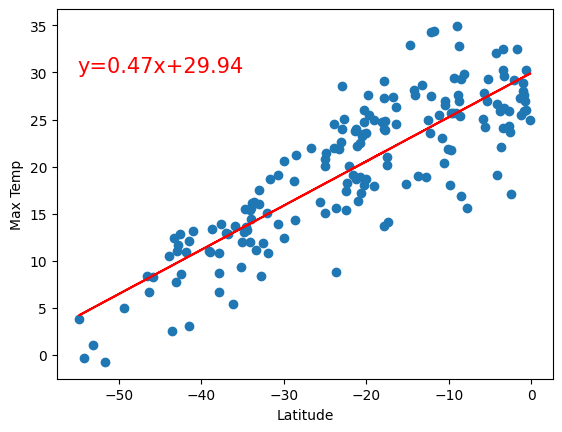

In [39]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Max Temp',(-55,30))

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and max temperature for the northern hemisphere, and there is a strong positive correlation between latitude and max temperature for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.001242707255182239


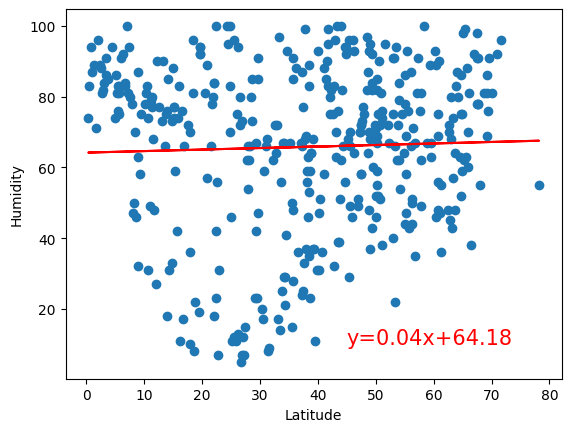

In [40]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Humidity',(45,10))

the r-value is: 0.007041990590326539


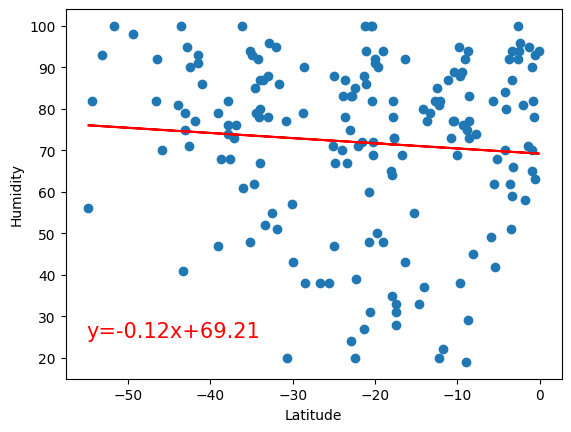

In [41]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Humidity',(-55,25))

**Discussion about the linear relationship:** Both the northern and southern hemisphere have no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.0004185713115683301


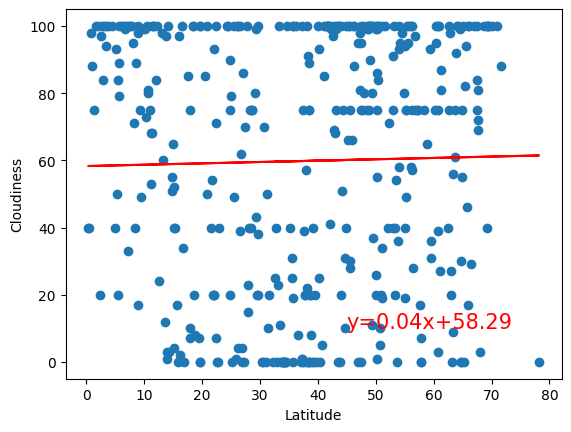

In [42]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Cloudiness',(45,10))

the r-value is: 0.007712391160239886


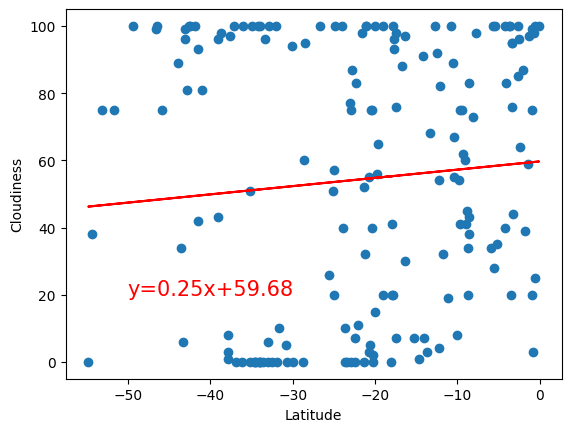

In [44]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Cloudiness',(-50,20))

**Discussion about the linear relationship:** For both the Northern and Southern hemisphere there is no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.0035302466922323673


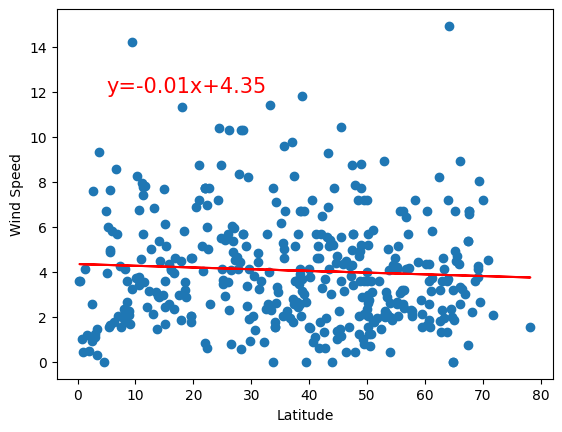

In [46]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Wind Speed',(5,12))

the r-value is: 3.481347146785782e-05


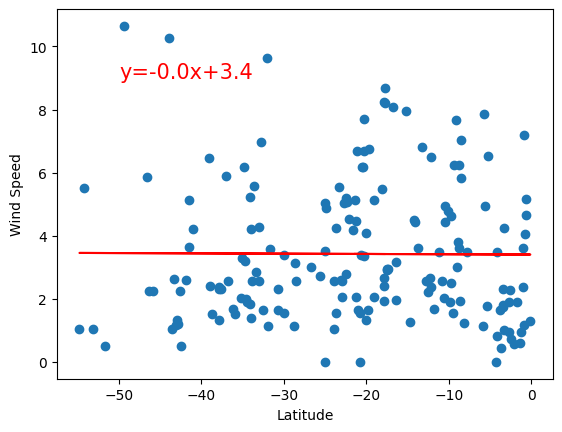

In [48]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Wind Speed',(-50,9))

**Discussion about the linear relationship:** For both the Northern and Southern hemisphere there is no correlation between latitude and wind speed.